In [97]:
# Dependencies
import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import datetime
import matplotlib.dates as mdates

# Load CSV
monthly_pt = os.path.join("..", "Datasets", "Monthly public transport patronage by Mode.csv")
covid_cases = os.path.join("..", "Datasets", "NCOV_cases_by_postcode_LGA.csv")

# Read and display with pandas
covid_cases_df = pd.read_csv(covid_cases)
monthly_pt_df = pd.read_csv(monthly_pt)
monthly_pt_df

,Year,Month,Month name,Metropolitan train,Metropolitan tram,Metropolitan bus,Regional train,Regional coach,Regional bus
0,2018,1,January,1.680993e+07,1.523137e+07,7.568547e+06,1466256,116568,7.212290e+05
1,2018,2,February,1.955448e+07,1.698092e+07,1.048731e+07,1522981,103197,1.118494e+06
2,2018,3,March,2.265901e+07,1.983213e+07,1.152890e+07,1809774,117180,1.224816e+06
3,2018,4,April,2.031204e+07,1.691987e+07,9.592750e+06,1684827,107480,9.462180e+05
4,2018,5,May,2.276845e+07,1.769143e+07,1.126349e+07,1790656,109456,1.258704e+06
5,2018,6,June,1.928476e+07,1.583617e+07,9.526795e+06,1535636,101215,1.077970e+06
6,2018,7,July,2.073210e+07,1.716924e+07,9.657327e+06,1799245,109103,9.676220e+05
7,2018,8,August,2.256677e+07,1.841559e+07,1.175671e+07,1845673,110348,1.261319e+06
8,2018,9,September,2.005649e+07,1.589277e+07,9.878596e+06,1676490,104525,1.033758e+06
9,2018,10,October,2.229976e+07,1.867749e+07,1.123398e+07,1872410,121267,1.232418e+06


In [98]:
monthly_time = pd.DataFrame({"Year":monthly_pt_df["Year"], "Month":monthly_pt_df["Month"]})

monthly_time["Day"] = 1

monthly_pt_df["Date"] = pd.to_datetime(monthly_time)
monthly_pt_df["Period"] = monthly_pt_df["Year"].astype(str) + "-" + monthly_pt_df["Month name"]

monthly_pt_df["Metropolitan train"] = pd.to_numeric(monthly_pt_df["Metropolitan train"])
monthly_pt_df["Metropolitan tram"] = pd.to_numeric(monthly_pt_df["Metropolitan tram"])
monthly_pt_df["Metropolitan bus"] = pd.to_numeric(monthly_pt_df["Metropolitan bus"])

# Convert as types to integers as this is total amount of tap ons and shouldn't require decimal places
monthly_pt_df = monthly_pt_df.astype({"Metropolitan train": "int64",
                                      "Metropolitan tram": "int64",
                                      "Metropolitan bus": "int64"})

monthly_pt_df.drop(monthly_pt_df[(monthly_pt_df["Year"] == 2018) & (monthly_pt_df["Month"] <= 5)].index, inplace=True)
monthly_pt_df.drop(monthly_pt_df[(monthly_pt_df["Year"] == 2022) & (monthly_pt_df["Month"] >= 7)].index, inplace=True)
monthly_pt_df = monthly_pt_df.reset_index()
monthly_pt_df.drop(['index', 'Regional train', 'Regional coach', 'Regional bus'],axis=1,inplace=True)

monthly_pt_df

,Year,Month,Month name,Metropolitan train,Metropolitan tram,Metropolitan bus,Date,Period
0,2018,6,June,19284755,15836171,9526795,2018-06-01,2018-June
1,2018,7,July,20732099,17169239,9657327,2018-07-01,2018-July
2,2018,8,August,22566766,18415592,11756706,2018-08-01,2018-August
3,2018,9,September,20056487,15892774,9878596,2018-09-01,2018-September
4,2018,10,October,22299761,18677490,11233979,2018-10-01,2018-October
5,2018,11,November,20806123,17398998,10367915,2018-11-01,2018-November
6,2018,12,December,16665365,15404107,7941245,2018-12-01,2018-December
7,2019,1,January,17074623,15695535,7845144,2019-01-01,2019-January
8,2019,2,February,20011823,16485000,10105546,2019-02-01,2019-February
9,2019,3,March,22250796,19456794,11775566,2019-03-01,2019-March


In [124]:
covid_cases_df = covid_cases_df.rename(columns={"diagnosis_date":"Date", "Total_case_count":"New Covid Cases"})
covid_cases_df["Date"] = pd.to_datetime(covid_cases_df["Date"])
covid_cases_df = pd.DataFrame(covid_cases_df.groupby("Date")["New Covid Cases"].sum())
covid_cases_df.drop(covid_cases_df[covid_cases_df.index > "2022-06-01"].index, inplace=True)
covid_cases_df = covid_cases_df.reset_index()
covid_cases_df

,Date,New Covid Cases
0,2020-01-25,1
1,2020-01-28,1
2,2020-01-30,1
3,2020-01-31,1
4,2020-02-22,2
...,...,...
694,2022-05-28,7023
695,2022-05-29,7947
696,2022-05-30,9088
697,2022-05-31,9285


**Question to be answered:**
How has each of the different modes of public transport increased or decreased in usage?

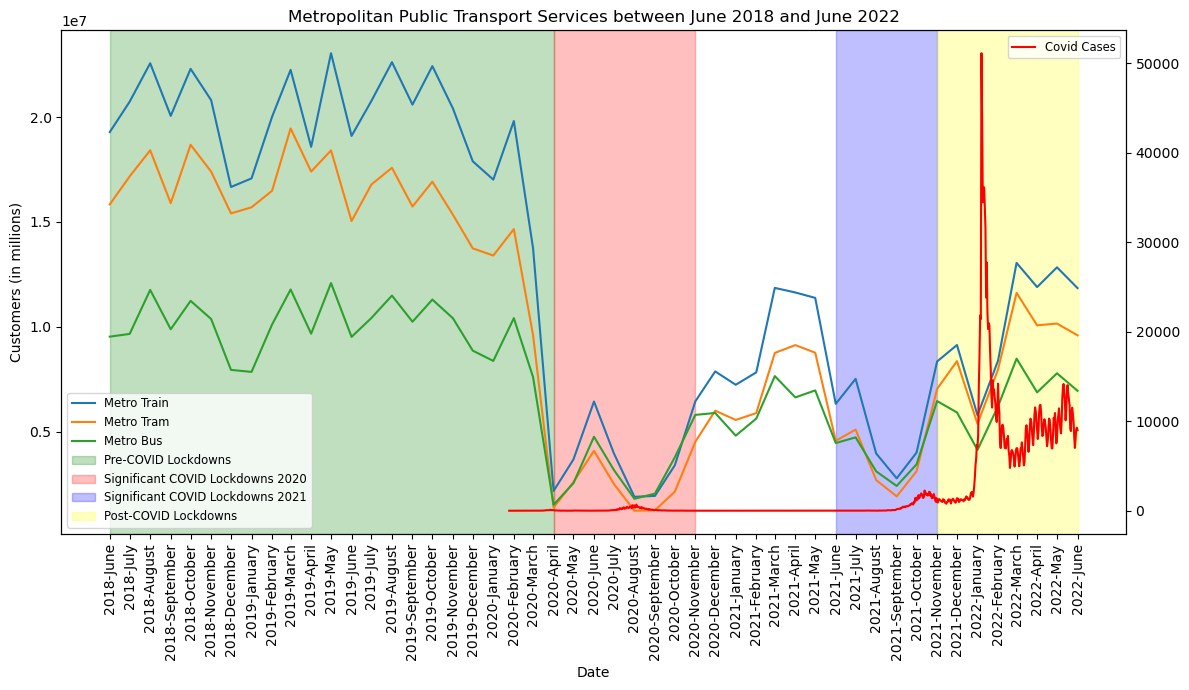

In [131]:
xvalues = monthly_pt_df["Date"]
mtrain = monthly_pt_df["Metropolitan train"]
mtram = monthly_pt_df["Metropolitan tram"]
mbus = monthly_pt_df["Metropolitan bus"]
date = covid_cases_df["Date"]
new_cases = covid_cases_df["New Covid Cases"]

plt.figure(figsize=(12,7))
plt.plot(xvalues,mtrain,label="Metro Train")
plt.plot(xvalues,mtram,label="Metro Tram")
plt.plot(xvalues,mbus,label="Metro Bus")
plt.title("Metropolitan Public Transport Services between June 2018 and June 2022")
# plt.axvspan("2018-June", "2020-April", alpha=0.25, color='green', label="Pre-COVID")
# plt.axvspan("2020-April", "2020-November", alpha=0.25, color='red', label="Significant COVID Lockdowns 2020")
# plt.axvspan("2021-June", "2021-November", alpha=0.25, color='blue', label="Significant COVID Lockdowns 2021")
# plt.axvspan("2021-November", "2022-June", alpha=0.25, color='yellow', label="Post-COVID")
plt.axvspan("2018-06-01", "2020-04-01", alpha=0.25, color='green', label="Pre-COVID Lockdowns")
plt.axvspan("2020-04-01", "2020-11-01", alpha=0.25, color='red', label="Significant COVID Lockdowns 2020")
plt.axvspan("2021-06-01", "2021-11-01", alpha=0.25, color='blue', label="Significant COVID Lockdowns 2021")
plt.axvspan("2021-11-01", "2022-06-01", alpha=0.25, color='yellow', label="Post-COVID Lockdowns")
plt.xlabel("Date")
plt.ylabel("Customers (in millions)")
plt.xticks(ticks = xvalues, labels = monthly_pt_df["Period"],rotation=90)
plt.legend(loc="best", fontsize="small",fancybox=True)
plt2 = plt.twinx()
plt2.plot(date,new_cases,label="Covid Cases",color="red")
plt2.legend(loc="best", fontsize="small",fancybox=True)
plt.tight_layout()
plt.savefig("../Visualisations/Q2-1.jpg")
plt.show()


In [132]:
monthly_pt_df["Month Counter"] = 1
for i in range(1, len(monthly_pt_df)):
     monthly_pt_df.loc[i, 'Month Counter'] = monthly_pt_df.loc[i-1, 'Month Counter'] + 1

monthly_pt_df

,Year,Month,Month name,Metropolitan train,Metropolitan tram,Metropolitan bus,Date,Period,Month Counter
0,2018,6,June,19284755,15836171,9526795,2018-06-01,2018-June,1
1,2018,7,July,20732099,17169239,9657327,2018-07-01,2018-July,2
2,2018,8,August,22566766,18415592,11756706,2018-08-01,2018-August,3
3,2018,9,September,20056487,15892774,9878596,2018-09-01,2018-September,4
4,2018,10,October,22299761,18677490,11233979,2018-10-01,2018-October,5
5,2018,11,November,20806123,17398998,10367915,2018-11-01,2018-November,6
6,2018,12,December,16665365,15404107,7941245,2018-12-01,2018-December,7
7,2019,1,January,17074623,15695535,7845144,2019-01-01,2019-January,8
8,2019,2,February,20011823,16485000,10105546,2019-02-01,2019-February,9
9,2019,3,March,22250796,19456794,11775566,2019-03-01,2019-March,10


In [133]:
pre_mtrain = monthly_pt_df.loc[monthly_pt_df["Month Counter"] < 23,["Metropolitan train"]].sum()
pre_mtram = monthly_pt_df.loc[monthly_pt_df["Month Counter"] < 23,["Metropolitan tram"]].sum()
pre_mbus = monthly_pt_df.loc[monthly_pt_df["Month Counter"] < 23,["Metropolitan bus"]].sum()

mid_mtrain = monthly_pt_df.loc[monthly_pt_df["Month Counter"].between(23, 42),["Metropolitan train"]].sum()
mid_mtram = monthly_pt_df.loc[monthly_pt_df["Month Counter"].between(23, 42),["Metropolitan tram"]].sum()
mid_mbus = monthly_pt_df.loc[monthly_pt_df["Month Counter"].between(23, 42),["Metropolitan bus"]].sum()

post_mtrain = monthly_pt_df.loc[monthly_pt_df["Month Counter"] > 42,["Metropolitan train"]].sum()
post_mtram = monthly_pt_df.loc[monthly_pt_df["Month Counter"] > 42,["Metropolitan tram"]].sum()
post_mbus = monthly_pt_df.loc[monthly_pt_df["Month Counter"] > 42,["Metropolitan bus"]].sum()

pre_covid = [pre_mtrain[0], pre_mtram[0], pre_mbus[0]]
mid_covid = [mid_mtrain[0], mid_mtram[0], mid_mbus[0]]
post_covid = [post_mtrain[0], post_mtram[0], post_mbus[0]]

labels = ["Metro Train","Metro Tram", "Metro Bus"]
explode = [0.1, 0, 0,]

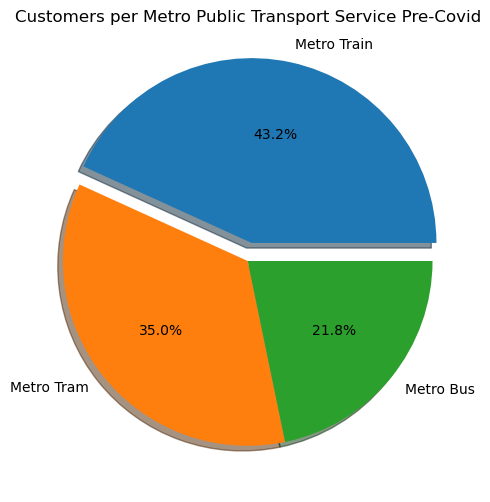

In [134]:
plt.figure(figsize=(6,6))
plt.pie(pre_covid, labels=labels, autopct="%1.1f%%",explode=explode,shadow = True)
plt.title("Customers per Metro Public Transport Service Pre-Covid")
plt.savefig("../Visualisations/Q2-2.1.jpg")
plt.show()

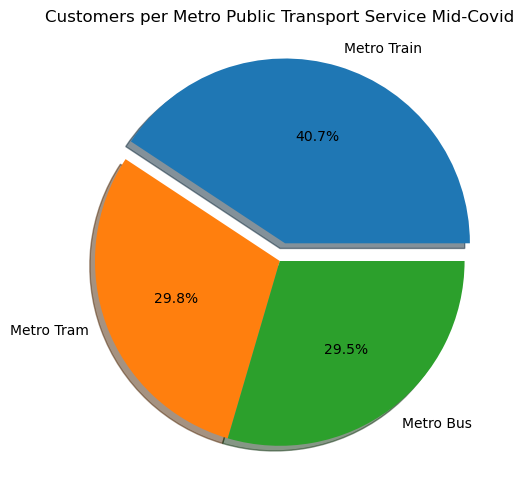

In [135]:
plt.figure(figsize=(6,6))
plt.pie(mid_covid, labels=labels, autopct="%1.1f%%",explode=explode,shadow = True)
plt.title("Customers per Metro Public Transport Service Mid-Covid")
plt.savefig("../Visualisations/Q2-2.2.jpg")
plt.show()

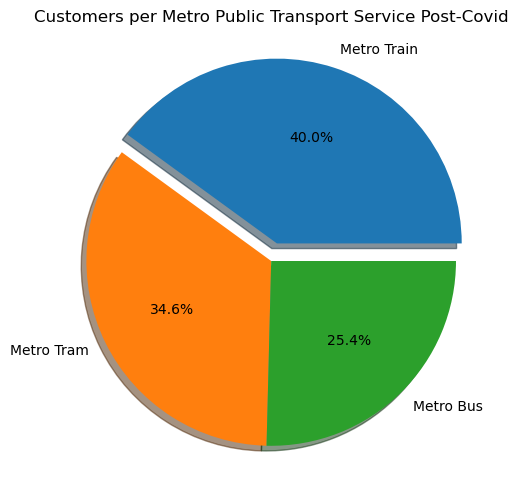

In [136]:
plt.figure(figsize=(6,6))
plt.pie(post_covid, labels=labels, autopct="%1.1f%%",explode=explode,shadow = True)
plt.title("Customers per Metro Public Transport Service Post-Covid")
plt.savefig("../Visualisations/Q2-2.3.jpg")
plt.show()